--- Schritt 2: 'Schmutzigen' Rohdatensatz laden ---
Datensatz geladen: rfd_main.csv
Dimensionen (Zeilen, Spalten): (1326, 15)

--- Schritt 3: Zielspalten definieren, begründen und auf NaN prüfen ---
Prüfung auf fehlende Werte (NaN) in den Zielspalten:
replies    0
views      0
votes      0
dtype: int64

STATUS: Keine fehlenden Werte (NaN) in den Zielspalten gefunden. Die LOF-Methode kann direkt angewendet werden.

--- Schritt 4: LOF-Methode anwenden ---
Daten für LOF-Analyse vorbereitet (Shape: (1326, 3))
Daten standardisiert (StandardScaler).
Starte LOF-Analyse (fit_predict)... Dies kann einige Sekunden dauern.
LOF-Analyse abgeschlossen.
ERGEBNIS (LOF): 53 Zeilen wurden als Ausreißer (Label -1) identifiziert.

--- Schritt 5: Visualisierung der LOF-Ergebnisse (Streudiagramme) ---
Erstelle Streudiagramme zur Visualisierung der LOF-Ergebnisse...


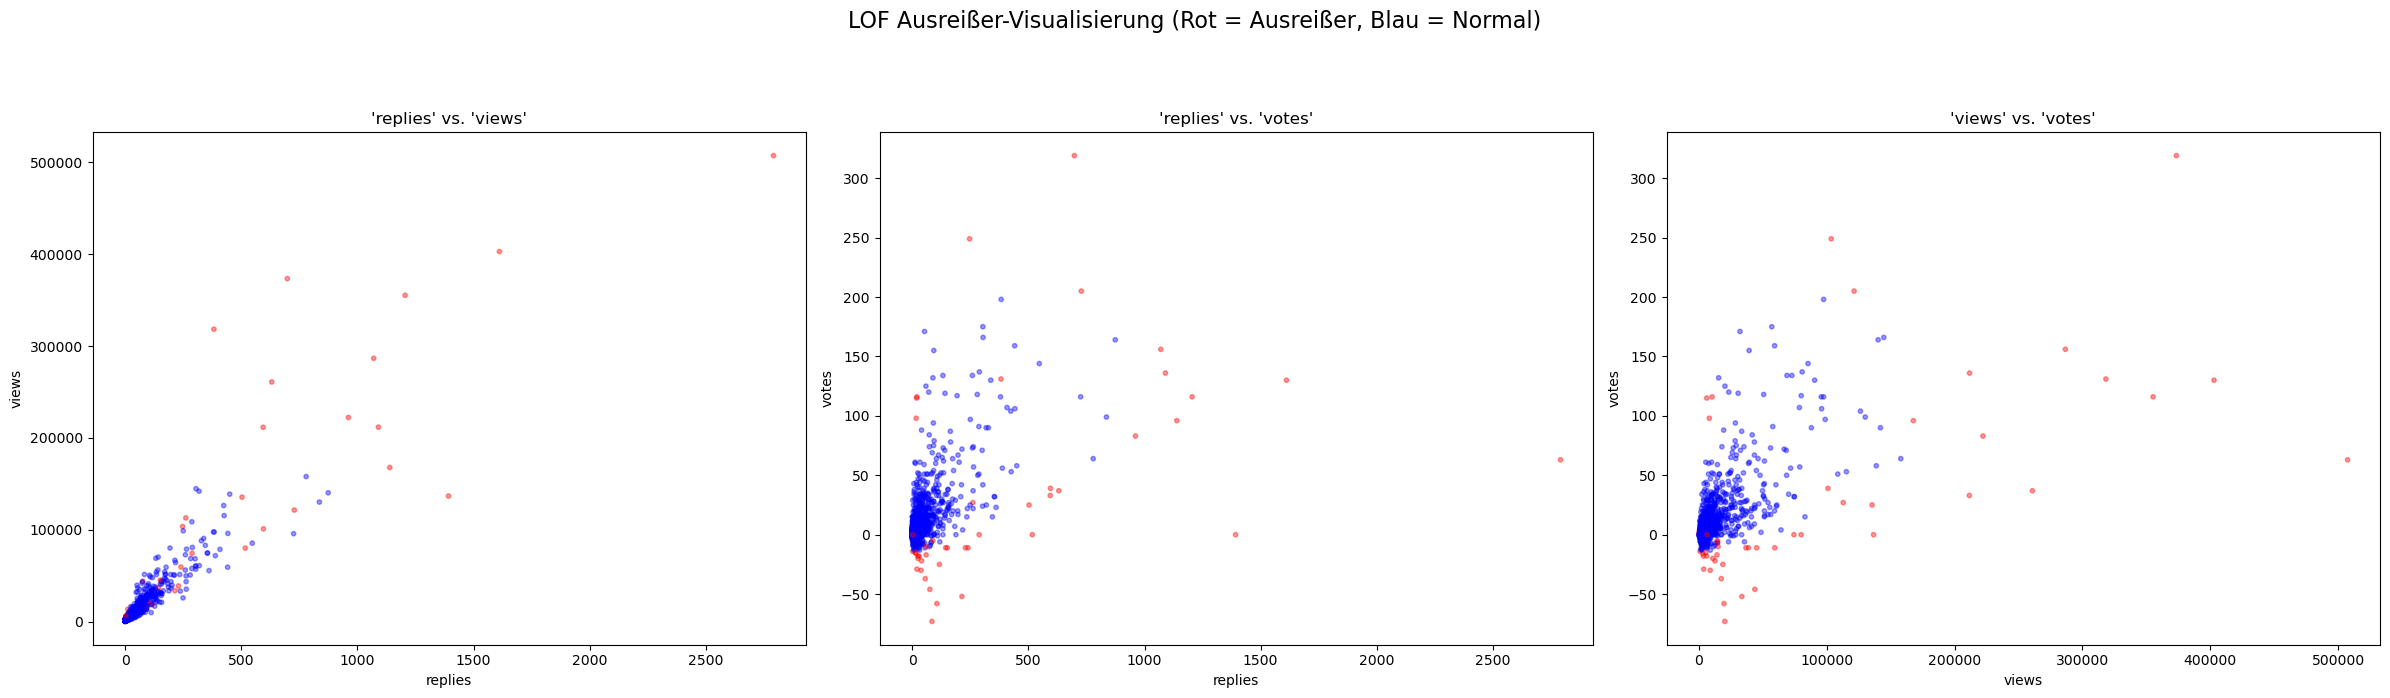


Visuelle Bestätigung:
Die roten Punkte (Ausreißer) sind jene Datenpunkte, die vom LOF-Modell als signifikant von ihrer lokalen Nachbarschaft (blaue Punkte) abweichend identifiziert wurden.
Diese Plots bestätigen die mehrdimensionale, dichte-basierte Erkennung des LOF-Algorithmus.

--- Schritt 6: Ergebnisse speichern und Zusammenfassung ---
Dieses Skript (03) ist nun abgeschlossen.

Ergebnisse (Ausreißer-Indizes) wurden in 'ergebnisse/1.2_lof_ausreisser_indizes.csv' gespeichert.

--- ZUSAMMENFASSUNG EXPERIMENT 1.2 (LOF) ---
Methode:           Klassisches ML: LOF (dichte-basiert)
Zieldaten:         rfd_main.csv (Shape: (1326, 15))
Zielspalten:       ['replies', 'views', 'votes'] (als 3D-Merkmalsraum)
Parameter (k):     20
Parameter (Cont.): auto
ERGEBNIS (COUNT):  53 einzigartige Ausreißerzeilen identifiziert.
Die Evaluierung dieser 53 Indizes erfolgt im Rahmen der quantitativen Analyse (Anzahl, Veränderung und Überschneidung der Ausreißermengen) in einem separaten Evaluierungs-Skript g

In [1]:
################################################################################
# MASTERARBEIT - SKRIPT 03:
# EXPERIMENT 1.2 (Forschungsfrage 1) - AUSREISSERERKENNUNG (LOF)
################################################################################
#
# ZWECK DIESES SKRIPTS (Methodik gemäß Abschnitt 3.3.1):
#
# 1. (Laden): Lädt den 'schmutzigen' Rohdatensatz (rfd_main.csv),
#             der in der EDA (Skript 01) analysiert wurde.
#
# 2. (Zielspalten): Fokussiert sich auf dieselben Spalten der 
#    Forschungsfrage 1 (Ausreißer): 'replies', 'views', 'votes'.
#
# 3. (Methode): Wendet die zweite Methode (erste klassische ML-Methode) an:
#    LOF (Local Outlier Factor). Diese Methode repräsentiert 
#    einen dichte-basierten Ansatz mit lokaler Perspektive 
#    (gemäß Abschnitt 2.2.2.2).
#
# 4. (Detektion): Führt die Ausreißererkennung für die Zielspalten durch 
#    und identifiziert die Indizes der Datenpunkte, die laut LOF als 
#    Ausreißer gelten.
#
# 5. (Visualisierung): Erstellt Streudiagramme (Scatter-Plots), um 
#    die von LOF identifizierten Ausreißer visuell von den 
#    "Inliern" (normalen Punkten) abzugrenzen.
#
# 6. (Speichern): Speichert die identifizierten Ausreißer-Indizes. 
#
################################################################################

# Schritt 1: Notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
#
################################################################################

# SCHRITT 2: Laden des 'schmutzigen' Rohdatensatzes
print("--- Schritt 2: 'Schmutzigen' Rohdatensatz laden ---")

# Gemäß ZWECK-Schritt 1 wird der 'schmutzige' Rohdatensatz (rfd_main.csv) geladen.
dateipfad = 'rfd_main.csv'
df_schmutzig = pd.read_csv(dateipfad)

# Die .shape-Ausgabe bestätigt die Dimensionen des Datensatzes.
# Dies ist ein Kontrollschritt, um sicherzustellen, dass die korrekte Datei 
# mit allen 1326 Zeilen geladen wurde.
print(f"Datensatz geladen: {dateipfad}")
print(f"Dimensionen (Zeilen, Spalten): {df_schmutzig.shape}")
print("=" * 70)
#
################################################################################

# SCHRITT 3: Zielspalten definieren, begründen und auf NaN prüfen
print("\n--- Schritt 3: Zielspalten definieren, begründen und auf NaN prüfen ---")

# --- BEGRÜNDUNG DER SPALTENAUSWAHL (basierend auf EDA Skript 01, Schritt 4) ---
#
# Für den LOF-Algorithmus (eine klassische ML-Methode) werden dieselben 
# Zielspalten wie für den IQR (traditionelle Methode) verwendet, um eine 
# methodisch konsistente Vergleichbarkeit (gemäß Forschungsfrage 1) zu 
# gewährleisten.
#
# 1. AUSGESCHLOSSENE SPALTE ('Unnamed: 0'): 
#    Diese Spalte wird ausgeschlossen, da sie als irrelevanter, 
#    technischer Index identifiziert wurde (vgl. Skript 02, Schritt 3).
#
# 2. AUSGEWÄHLTE SPALTEN ('replies', 'views', 'votes'): 
#    Diese drei Spalten wurden als primäre Ziele für die 
#    Ausreißererkennung identifiziert (logische Fehler, extreme Werte).
#    Der LOF wird auf diesem 3-dimensionalen Datenraum operieren.
#
# --- ENDE DER BEGRÜNDUNG ---

zielspalten = ['replies', 'views', 'votes']

# Methodische Prüfung auf NaN-Werte (Wissenschaftliche Sorgfalt):
# Der LOF-Algorithmus (scikit-learn Implementierung) kann nicht mit 
# fehlenden Werten (NaN) umgehen. Daher ist diese Überprüfung eine 
# zwingende technische Voraussetzung.
print("Prüfung auf fehlende Werte (NaN) in den Zielspalten:")
fehlende_werte = df_schmutzig[zielspalten].isnull().sum()
print(fehlende_werte)

if fehlende_werte.sum() > 0:
    print("\nWARNUNG: Es wurden fehlende Werte gefunden. Diese müssen vor der \
LOF-Anwendung behandelt werden (z.B. durch Entfernen oder Imputation).")
else:
    print("\nSTATUS: Keine fehlenden Werte (NaN) in den Zielspalten gefunden. \
Die LOF-Methode kann direkt angewendet werden.")

print("=" * 70)
#
################################################################################

# SCHRITT 4: Definition und Anwendung der LOF-Methode
print("\n--- Schritt 4: LOF-Methode anwenden ---")

# Gemäß ZWECK-Schritt 3 wird nun der LOF-Algorithmus
# (Local Outlier Factor) angewendet.

# 1. Extrahieren der Zieldaten
# Im Gegensatz zur IQR-Methode, die jede Spalte einzeln betrachtet, 
# operieren ML-Methoden wie LOF auf einem mehrdimensionalen Merkmalsraum.
# Wir extrahieren die drei Zielspalten als 3D-Datenraum.
X = df_schmutzig[zielspalten].values
print(f"Daten für LOF-Analyse vorbereitet (Shape: {X.shape})")

# 2. Standardisierung der Merkmale, um Skaleneffekte zu reduzieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Daten standardisiert (StandardScaler).")

# 3. Initialisierung des LOF-Modells
# Wir verwenden die Standardimplementierung von scikit-learn, 
# wie in Abschnitt 3.5 der Methodik festgelegt.
#
# Wichtige methodische Parameter (gemäß Abschnitt 2.2.2.2):
#   n_neighbors (k): 20 (Standardwert in scikit-learn). Dieser Parameter
#                    definiert die Größe der "lokalen Nachbarschaft", 
#                    die zur Dichteberechnung verwendet wird.
#   contamination: 'auto' (Standardwert, entspricht oft 0.1 oder 10%). 
#                  Dieser Parameter dient als Schwellenwert und gibt den 
#                  erwarteten Anteil an Ausreißern im Datensatz an. 
#                  Die Festlegung dieses Wertes ist eine zentrale 
#                  Herausforderung bei dichte-basierten Methoden.

lof_modell = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# 4. Training des Modells und Vorhersage der Ausreißer
# Die Funktion .fit_predict() führt zwei Schritte aus: 
# (1) Sie lernt die lokale Dichte-Struktur der Daten (fit) und 
# (2) weist jedem Datenpunkt ein Label zu (predict).
#
# Die Labels sind:
#   1 = Inlier (normaler Datenpunkt)
#  -1 = Outlier (Ausreißer)
print("Starte LOF-Analyse (fit_predict)... Dies kann einige Sekunden dauern.")
y_vorhersage = lof_modell.fit_predict(X_scaled)
print("LOF-Analyse abgeschlossen.")

# 5. Extrahieren der als Ausreißer identifizierten Indizes
# Wir filtern die ursprünglichen DataFrame-Indizes, 
# bei denen die Vorhersage (y_vorhersage) dem Wert -1 (Ausreißer) entspricht.
ausreisser_indizes_lof = df_schmutzig.index[y_vorhersage == -1].tolist()

# 6. Zusammenfassung dieses Schritts
print(f"ERGEBNIS (LOF): {len(ausreisser_indizes_lof)} Zeilen wurden als \
Ausreißer (Label -1) identifiziert.")
print("=" * 70)
#
################################################################################

# SCHRITT 5: Visualisierung der LOF-Ergebnisse (Streudiagramme)
print("\n--- Schritt 5: Visualisierung der LOF-Ergebnisse (Streudiagramme) ---")

# Gemäß ZWECK-Schritt 5 werden nun die Ergebnisse des LOF visualisiert.
#
# Methodischer Unterschied zum IQR (Skript 02):
# Der IQR-Ansatz ist univariat (eindimensional). Wir konnten für jede Spalte 
# einen separaten Box-Plot erstellen.
# Der LOF-Ansatz ist multivariat (mehrdimensional). Er hat die Ausreißer 
# basierend auf der Dichte im 3D-Raum ('replies', 'views', 'votes') gefunden.
#
# Daher erstellen wir 2D-Streudiagramme (Scatter-Plots) für jede 
# Spaltenkombination, um zu visualisieren, welche Punkte (in Rot) 
# von den normalen Punkten (in Blau) isoliert wurden.

print("Erstelle Streudiagramme zur Visualisierung der LOF-Ergebnisse...")

# 1. Erstellen einer Farbzuordnung
# Wir verwenden die Ergebnisse (y_vorhersage) aus Schritt 4.
# Normale Punkte (Label 1) werden blau ('blue')
# Ausreißer (Label -1) werden rot ('red')
farben = np.where(y_vorhersage == 1, 'blue', 'red')

# 2. Definieren der 2D-Plot-Kombinationen (um 3D-Daten zu zeigen)
plot_kombinationen = [
    ('replies', 'views'),
    ('replies', 'votes'),
    ('views', 'votes')
]

# 3. Erstellen der Plots
fig, axes = plt.subplots(nrows=1, ncols=len(plot_kombinationen), figsize=(24, 7))

# Setzen eines Haupttitels für die gesamte Abbildung
fig.suptitle('LOF Ausreißer-Visualisierung (Rot = Ausreißer, Blau = Normal)', 
             fontsize=16, y=1.02)

for i, (spalte_x, spalte_y) in enumerate(plot_kombinationen):
    ax = axes[i]
    
    # Erstellen des Streudiagramms
    ax.scatter(
        df_schmutzig[spalte_x], 
        df_schmutzig[spalte_y], 
        c=farben,       # Farben basierend auf der LOF-Vorhersage
        s=10,           # Kleine Punktgröße
        alpha=0.4       # Transparenz für überlappende Punkte
    )
    
    ax.set_title(f"'{spalte_x}' vs. '{spalte_y}'")
    ax.set_xlabel(spalte_x)
    ax.set_ylabel(spalte_y)

# Optimiert das Layout, um Überlappungen zu verhindern
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nVisuelle Bestätigung:")
print("Die roten Punkte (Ausreißer) sind jene Datenpunkte, die vom LOF-Modell \
als signifikant von ihrer lokalen Nachbarschaft (blaue Punkte) \
abweichend identifiziert wurden.")
print("Diese Plots bestätigen die mehrdimensionale, dichte-basierte \
Erkennung des LOF-Algorithmus.")
print("=" * 70)
#
################################################################################

# SCHRITT 6: Ergebnisse speichern und Zusammenfassung
print("\n--- Schritt 6: Ergebnisse speichern und Zusammenfassung ---")
print("Dieses Skript (03) ist nun abgeschlossen.")

# Wir stellen sicher, dass der Speicher-Ordner ('ergebnisse') existiert,
# um die Ergebnisse strukturiert abzulegen.
os.makedirs('ergebnisse', exist_ok=True)

# Gemäß ZWECK-Schritt 6 werden die identifizierten Ausreißer-Indizes 
# für die spätere Evaluierung gespeichert.

# 1. Definieren des Dateipfads für die Ergebnisse
ergebnis_dateipfad = 'ergebnisse/1.2_lof_ausreisser_indizes.csv'

# 2. Umwandeln der Index-Liste in eine sortierte Liste
# (aus Schritt 4, 'ausreisser_indizes_lof')
# Dies gewährleistet eine konsistente, reproduzierbare Ausgabe-Datei.
ausreisser_liste_sortiert = sorted(ausreisser_indizes_lof)

# 3. Erstellen eines Pandas DataFrame aus der Liste
df_ergebnisse_lof = pd.DataFrame(
    ausreisser_liste_sortiert, 
    columns=['Ausreisser_Index']
)

# 4. Speichern des DataFrames als CSV-Datei
df_ergebnisse_lof.to_csv(ergebnis_dateipfad, index=False)

print(f"\nErgebnisse (Ausreißer-Indizes) wurden in '{ergebnis_dateipfad}' gespeichert.")

# --- ZUSAMMENFASSUNG (Für das Protokoll/die Masterarbeit) ---
# Die folgende Zusammenfassung dokumentiert das quantitative Hauptergebnis 
# dieses Experiments (Skript 03) für die Berichterstattung in der Masterarbeit.
print("\n--- ZUSAMMENFASSUNG EXPERIMENT 1.2 (LOF) ---")
print(f"Methode:           Klassisches ML: LOF (dichte-basiert)")
print(f"Zieldaten:         {dateipfad} (Shape: {df_schmutzig.shape})")
print(f"Zielspalten:       {zielspalten} (als 3D-Merkmalsraum)")
print(f"Parameter (k):     {lof_modell.n_neighbors}")
print(f"Parameter (Cont.): {lof_modell.contamination}")
print(f"ERGEBNIS (COUNT):  {len(df_ergebnisse_lof)} einzigartige Ausreißerzeilen identifiziert.")
print("=" * 70)
print(f"Die Evaluierung dieser {len(df_ergebnisse_lof)} Indizes erfolgt im Rahmen der \
quantitativen Analyse (Anzahl, Veränderung und Überschneidung der Ausreißermengen) \
in einem separaten Evaluierungs-Skript gemäß Abschnitt 3.4.")
print("=" * 70)
#
################################################################################